In [1]:
import numpy as np
import sympy as sm 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Dane Sabo
October 2nd, 2024

# Problem 3.7.2 (Written)

In [2]:
def linear_phase_portrait_info(A):
    print('\n Input Matrix:')
    print(A)
    
    print('\n Eigenvalues and Eigenvectors:')
    print(np.linalg.eig(A).eigenvalues)
    print(np.linalg.eig(A).eigenvectors)
    
    print('\n Trace:')
    print(np.linalg.trace(A))

    print('\n Determinant:')
    print(np.linalg.det(A))

Sketch phase portraits for the following linear systems:
## $\dot x = 0$, $\dot y = x + 2y$
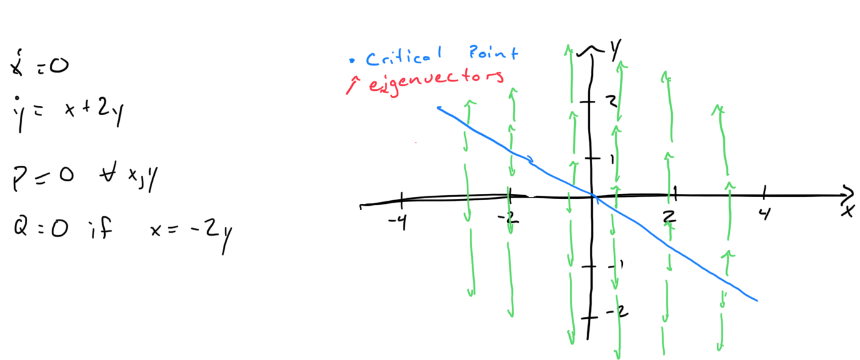

In [3]:
A = np.array([[0,0],[1,2]])
linear_phase_portrait_info(A)


 Input Matrix:
[[0 0]
 [1 2]]

 Eigenvalues and Eigenvectors:
[2. 0.]
[[ 0.          0.89442719]
 [ 1.         -0.4472136 ]]

 Trace:
2

 Determinant:
0.0


## $\dot x = x+2y$, $\dot y = 0$
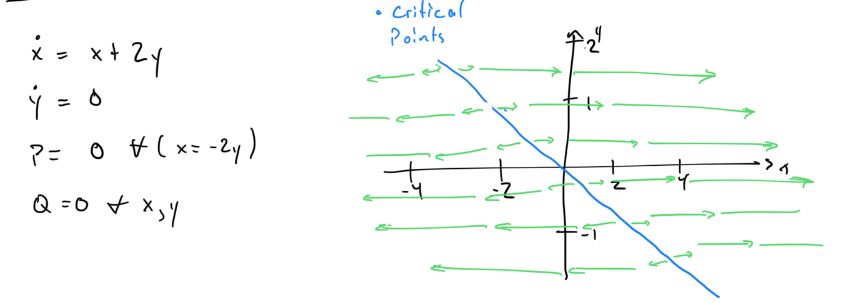

In [4]:
A = np.array([[1,2],[0,0]])
linear_phase_portrait_info(A)


 Input Matrix:
[[1 2]
 [0 0]]

 Eigenvalues and Eigenvectors:
[1. 0.]
[[ 1.         -0.89442719]
 [ 0.          0.4472136 ]]

 Trace:
1

 Determinant:
0.0


## $\dot x = 3x+4y$, $\dot y = 4x - 3y$
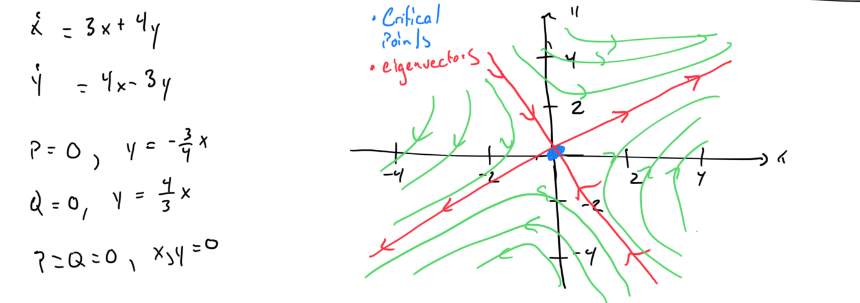

In [5]:
A = np.array([[3,4],[4,-3]])
linear_phase_portrait_info(A)


 Input Matrix:
[[ 3  4]
 [ 4 -3]]

 Eigenvalues and Eigenvectors:
[ 5. -5.]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]

 Trace:
0

 Determinant:
-25.000000000000007


## $\dot x = 3x+y$, $\dot y = -x + 3y$
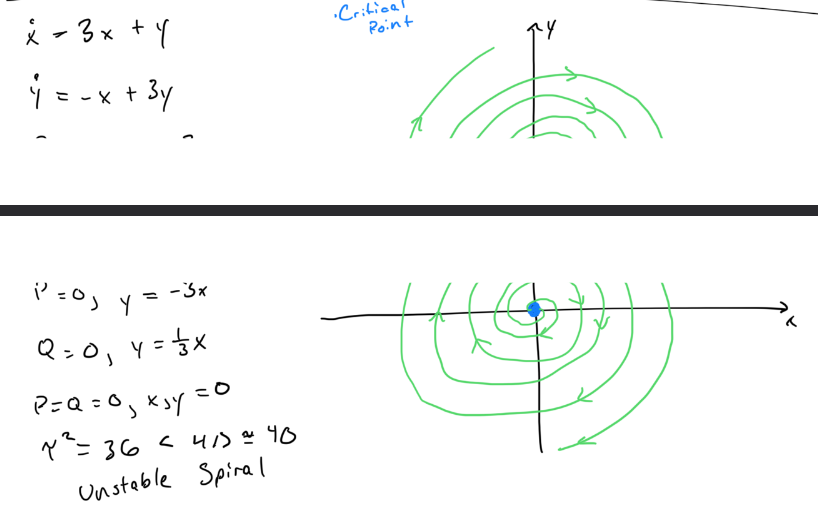

In [6]:
A = np.array([[3,1],[-1,3]])
linear_phase_portrait_info(A)


 Input Matrix:
[[ 3  1]
 [-1  3]]

 Eigenvalues and Eigenvectors:
[3.+1.j 3.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]

 Trace:
6

 Determinant:
10.000000000000002


# Problem 3.7.4 (Python)
Plot the phase portraits for the following systems:

In [7]:
def phase_portrait(P, Q, ts = [1], ic = [1]):
    """
    A function that takes in a P and Q as lambda functions, and plots some stuff with them
    Parameters:
    P: first differential equation as a lambda function of two variables
    Q: Second differential equation as a lambda function of two variables
    ts (OPTIONAL): A np.linspace of the time domain for trajectory solutions
    ic (OPTIONAL): A np.linspace of initial spacial conditions

    Returns:
    None. It does print a graph though that is titled with the functions, includes a quiver plot, a trajectory sampling, and the critical points.
    """
    #Create symbolic variables
    x, y = sm.symbols('x,y')

    #def differential equation
    def dX_dt(X,t, args = (P,Q)):
        return [P(X[0],X[1]), Q(X[0],X[1])]
    
    #Set P(x,y) = 0 and Q(x,y) = 0
    Peqn = sm.Eq(P(x,y),0)
    Qeqn = sm.Eq(Q(x,y),0)

    #solve our equations for populations of species of x and y
    criticalpoints = sm.solve((Peqn,Qeqn),x,y)
    print('Critical Points:')
    print(criticalpoints)

    #Set up Time and Initial Condition Domains
    ts = np.linspace(0,0.01,10) if ts[0] == 1 else ts
    ic = np.linspace(-4, 4, 25) if ic[0] == 1 else ic
    
    #calculate a vectorfield
    X,Y = np.mgrid[ic[0]:ic[-1]:20j,ic[0]:ic[-1]:20j]
    u = P(X,Y)
    v = Q(X,Y)
    plt.quiver(X,Y,u,v,color = "red")
   
    #plot trajectories
    plt.title(f'Phase Portrait for $\\dot x = $ {Peqn.lhs} and $\\dot y = $ {Qeqn.lhs}')
    plt.xlabel('x'); plt.ylabel('y'); plt.grid('both')
    plt.xlim((ic[0],ic[-1])); plt.ylim((ic[0],ic[-1]))
    
    for r in ic:
        for s in ic:
            X0 = [r,s]
            Xs = odeint(dX_dt,X0,ts)
            plt.plot(Xs[:,0],Xs[:,1], "royalblue",linewidth = 0.75)

    for i in range(np.size(criticalpoints)//2):
        #Do NOT print imaginary critical points
        if sm.im(criticalpoints[i][0]) == 0 and sm.im(criticalpoints[i][1]) == 0:
            plt.plot(criticalpoints[i][0],criticalpoints[i][1],"yo")
            

## $\dot x = y$, $\dot y = x-y+x^3$

Critical Points:
[(0, 0), (-I, 0), (I, 0)]


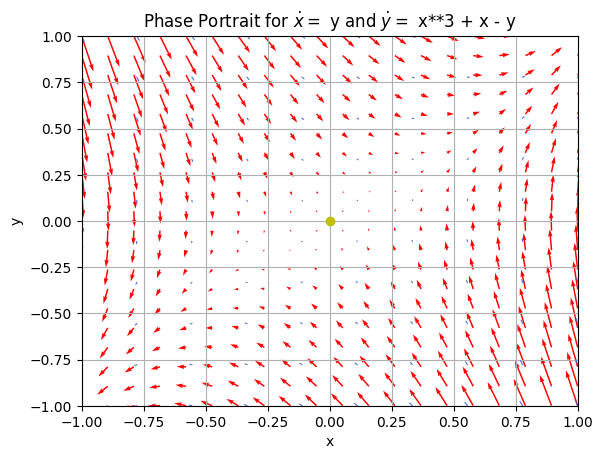

In [8]:
P = lambda x, y: y
Q = lambda x, y: x - y + x**3
phase_portrait(P, Q, ic = np.linspace(-1, 1, 10))

## $\dot x = -2x-y+2$, $\dot y = xy$

Critical Points:
[(0, 2), (1, 0)]


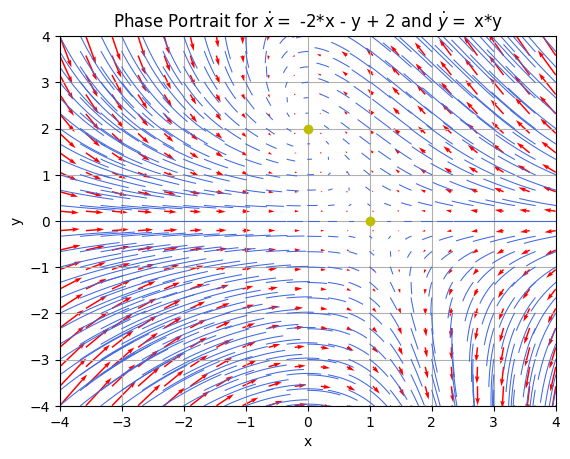

In [9]:
P = lambda x, y: -2*x - y + 2
Q = lambda x, y: x*y 
phase_portrait(P, Q, ts = np.linspace(0,0.1,10))

## $\dot x = x^2- y^2$, $\dot y = xy-1$

Critical Points:
[(-1, -1), (1, 1), (-I, I), (I, -I)]


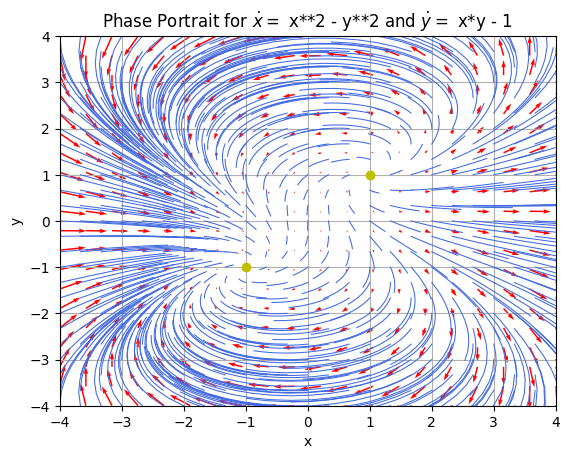

In [10]:
P = lambda x, y: x**2 - y**2
Q = lambda x, y: x*y - 1
phase_portrait(P, Q, ts = np.linspace(0,0.2,10))

## $\dot x = 2-x-y^2$, $\dot y = -y(x^2 + y^2 -3x +1)$

Critical Points:
[(1, -1), (1, 1), (2, 0), (3, -I), (3, I)]


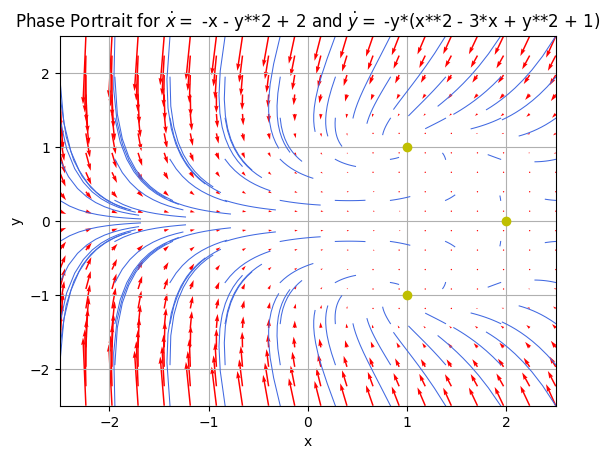

In [11]:
P = lambda x, y: 2 - x - y**2
Q = lambda x, y: -y*(x**2 + y**2 - 3*x +1)
phase_portrait(P, Q, ic = np.linspace(-2.5, 2.5, 10), ts = np.linspace(0,0.2,10))

# Problem 3.7.5 (Written)
Construct a nonlinear system that has four critical points: two saddle points, one stable focus, and one unstable focus.

Critical Points:
[(-1, -1), (-1, 1), (1, -1), (1, 1)]


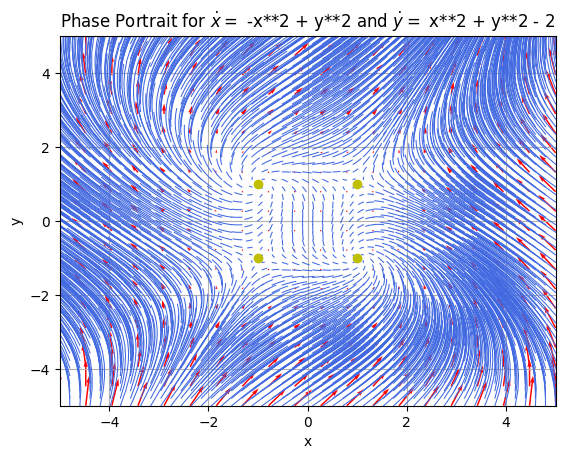

In [12]:
P = lambda x, y: y**2 - x**2
Q = lambda x, y: x**2 + y**2 - 2
phase_portrait(P, Q, ic = np.linspace(-5, 5, 50), ts = np.linspace(0,0.1,10))

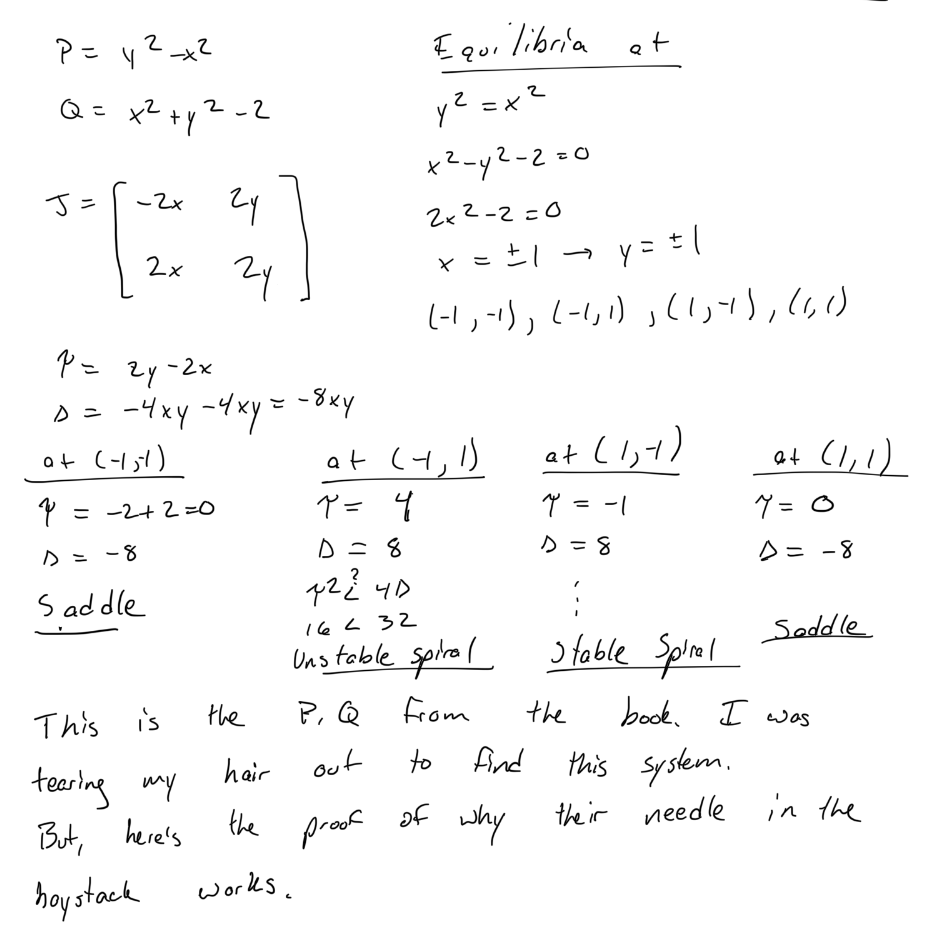

# Problem 3.7.6 (Written)
A nonlinear capacitor-resistor electrical circuit can be modeled using the differential equations
$$ \dot x = y $$
$$\dot y = -x + x^3 - (a_0 + x)y$$
where $a_0$ is a nonzero constant and $x(t)$ represents the current in the circuit at time t. Sketch phase portraits when $a_0 > 0$ and $a_0<0$ and give a physical interpretation of the results.

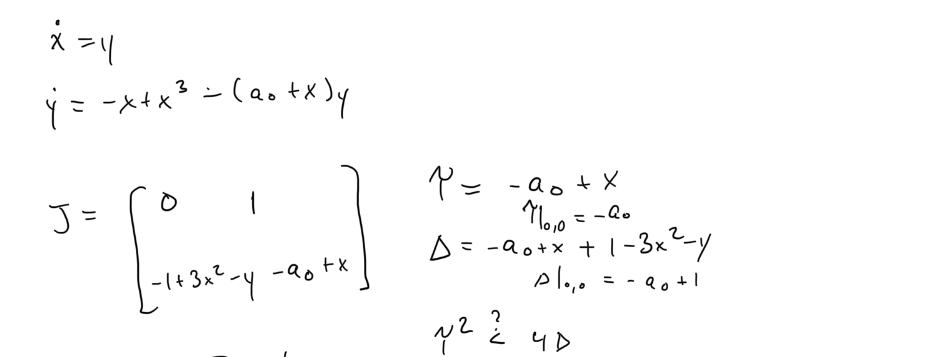
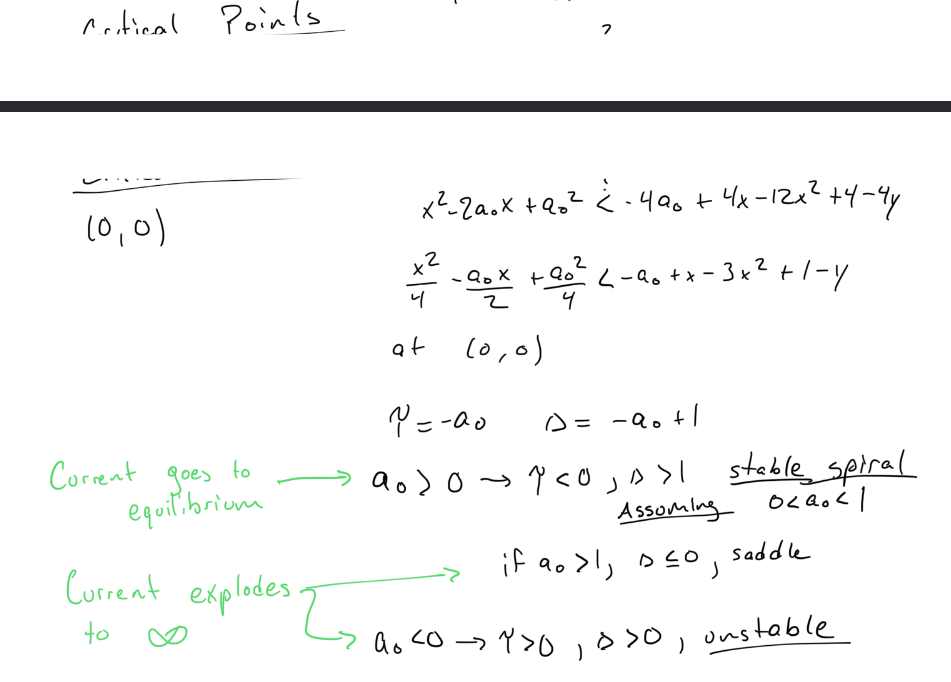
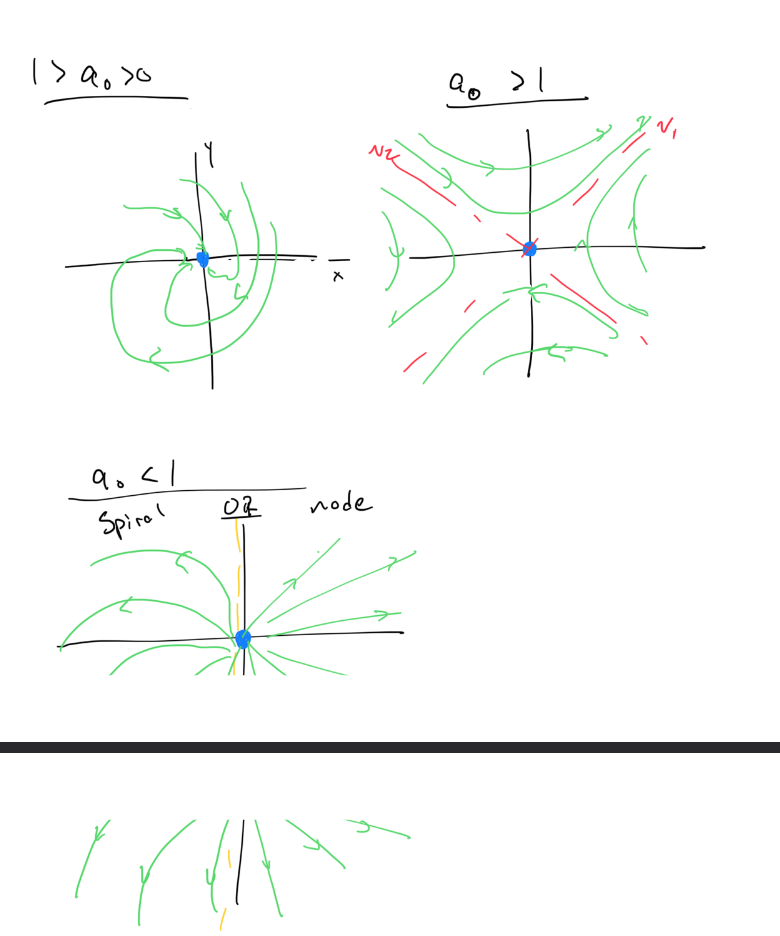

# Problem 4.5.6 (Python)
A predator-prey system may be modeled using the differential equations
$$ \dot x = x (1-y-\epsilon x)$$
$$ \dot y = y (-1 + x - \epsilon y)$$
where $x(t)$ is the population of prey and $y(t)$ is the predator population size at time t, respectively. Classify the critical points for $\epsilon>0$ and plot phase portraits for the different types of qualitative behavior. Interpret the results in physical terms

| Critical Point | Type | 
|-------|------|
|(0,0)| Saddle |
|(1,0)| Stable Spiral |
|(0,-1) | Unstable Spiral |

When $\epsilon$ is positive, this means that a certain number of the species die off on their own over time. The positive $\epsilon$ directly results in a negative feedback loop on number of individuals.

You can see this in the top right quadrant, which is the only case that is physically possible with positive numbers of both predator and prey. Over time, all trajectories settle on (1,0), where there is a baseline number of prey but no predators remain.

In [ ]:
epsilon = 1
P = lambda x, y: x*(1-y-epsilon*x)
Q = lambda x, y: y*(-1 + x- epsilon*y)
phase_portrait(P, Q, ic = np.linspace(-1.51, 1.51, 35), ts = np.linspace(0,-0.1,5))

When $\epsilon$ is between -1 and 1, the two species have feedback on their own population that changes where equilibrium is, but a stable equilibrium point exists. When $\epsilon$ is 0, the species are perfectly balanced and will travel around a stable center. Otherwise, the species have some damping introduced, and will converge to a stable spiral.

In [ ]:
epsilon = 0
P = lambda x, y: x*(1-y-epsilon*x)
Q = lambda x, y: y*(-1 + x- epsilon*y)
phase_portrait(P, Q, ic = np.linspace(-1.51, 1.51, 35), ts = np.linspace(0,-0.1,5))

In [ ]:
epsilon = 0.5
P = lambda x, y: x*(1-y-epsilon*x)
Q = lambda x, y: y*(-1 + x- epsilon*y)
phase_portrait(P, Q, ic = np.linspace(-1.51, 1.51, 35), ts = np.linspace(0,-0.1,5))

When $\epsilon$ is -1 or less, there is actually positive feedback on species population. This is an unstable system, as we can see populations in the top right quadrant skyrocket.

In [ ]:
epsilon = -1
P = lambda x, y: x*(1-y-epsilon*x)
Q = lambda x, y: y*(-1 + x- epsilon*y)
phase_portrait(P, Q, ic = np.linspace(-1.51, 1.51, 35), ts = np.linspace(0,-0.1,15))